## A Data Science case study

This case study is about analyzing academic articles in PDF from Sci-Hub website in the Niagara region using the Python programming language. 
The SCI-Hub database provides data of usage logs of the articles. The data is from 2017. We will do some exploration and visualization on this data to learn more about usage of these articles. 

In [1]:
# Welcome to the case study.

print("Welcome to this case study")


Welcome to this case study


In [27]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/BrockDSL/SciHub_Workshop/master/niagara_scihub_2017_use.tab",sep="\t")

# specify the columns
data.columns = ["date","doi","pub_code","user_code","country","city","lat","long"]

# sort the dataset
data = data.sort_values(by="date", ascending = False)

# Look at the first 10 columns of the data
data.head(10)

,date,doi,pub_code,user_code,country,city,lat,long
15669,2017-12-30 02:11:20,10.1109/MSP.2014.2329397,17149789,46591555,Canada,Saint Catharines,43.159374,-79.246863
10676,2017-12-30 02:11:20,10.1109/MSP.2014.2329397,17149789,46591555,Canada,Saint Catharines,43.159374,-79.246863
4791,2017-12-30 02:11:20,10.1109/MSP.2014.2329397,17149789,46591555,Canada,Saint Catharines,43.159374,-79.246863
19770,2017-12-30 02:11:20,10.1109/MSP.2014.2329397,17149789,46591555,Canada,Saint Catharines,43.159374,-79.246863
15668,2017-12-29 01:50:42,10.1111/j.1462-2920.2012.02747.x,7765001,46417065,Canada,Saint Catharines,43.159374,-79.246863
4790,2017-12-29 01:50:42,10.1111/j.1462-2920.2012.02747.x,7765001,46417065,Canada,Saint Catharines,43.159374,-79.246863
10675,2017-12-29 01:50:42,10.1111/j.1462-2920.2012.02747.x,7765001,46417065,Canada,Saint Catharines,43.159374,-79.246863
19769,2017-12-29 01:50:42,10.1111/j.1462-2920.2012.02747.x,7765001,46417065,Canada,Saint Catharines,43.159374,-79.246863
6001,2017-12-28 16:53:48,10.1517/14740338.5.3.433,7953269,46354212,Canada,Fort Erie,42.901776,-78.972174
10994,2017-12-28 16:53:48,10.1517/14740338.5.3.433,7953269,46354212,Canada,Fort Erie,42.901776,-78.972174


### Columns Description
Let's look at what different columns are in our data.
- date - The date the article was downloaded
- doi - Is something like the serial number of the article more info
- pub_code - a randomized serial number that represents the publisher behind the article
- user_code - a randomized serial number that represents the user who downloaed the article
- county - The country the usage is from. (The original datafile is global)
- city - Which city in Niagara the user lives in
- lat - the latitude of the center of the city found in city
- long - the longtitude of the center of the city found in city


### Answering questions on the dataset

#### 1. How many entries are in the dataset?

In [28]:
total_papers = len(data)
total_papers

20629

#### 2. How many users are in the dataset ?
Hint: user_code  column represents the user who downloaed the article

In [29]:
unique_users = data["user_code"].nunique()
unique_users

1040

#### 3. How many unique paper are in the data?
doi column represent a unique paper.

In [30]:
unique_papers = data["doi"].nunique()
unique_papers

4673

#### 4. How many unique publishers are in the data ?
pub_code represent a unique publisher


In [31]:
unique_publishers = data["pub_code"].nunique()
unique_publishers

774

#### 5. What is the average papers downloaded per user?

In [32]:
avg_downloads_per_user = total_papers / unique_users

avg_downloads_per_user

19.835576923076925

#### 6. Which city had the highest number of paper downloads ?


In [33]:
data['city'].value_counts().head(1)

Saint Catharines    14984
Name: city, dtype: int64

#### 7. Which city had the lowest number of paper downloads ?

In [34]:
data['city'].value_counts().tail(1)

Lincoln    4
Name: city, dtype: int64

### Revenue from the sale of the articles

Let's assume each article cost $10 on average, how much revenue was lost from the free downloads of the article?

In [35]:
cost_per_article = 10
lost_revenue = cost_per_article * total_papers
lost_revenue

206290

### Most popular article

#### Let's find the most downloaded article

Which article has been most downloaded ?



In [36]:
popular_article = data.groupby('doi').count().sort_values(by='date', ascending = False)
popular_article

,date,pub_code,user_code,country,city,lat,long
doi,,,,,,,
10.1071/CH06322,60,60,60,60,60,60,60
10.1002/zaac.19693700513,52,52,52,52,52,52,52
10.1071/CH10259,52,52,52,52,52,52,52
10.1246/bcsj.71.1923,40,40,40,40,40,40,40
10.2165/11533090-000000000-00000,32,32,32,32,32,32,32
...,...,...,...,...,...,...,...
10.1021/bk-1996-0640.ch004,1,1,1,1,1,1,1
10.1249/01.MSS.0000113478.92945.CA,1,1,1,1,1,1,1
10.1249/01.mss.0000227538.20799.08,1,1,1,1,1,1,1


#### Which user has downloaded the most papers

In [37]:
top_users = data.groupby("user_code").count().sort_values(by='date', ascending = False)
top_users

,date,doi,pub_code,country,city,lat,long
user_code,,,,,,,
523173,736,736,736,736,736,736,736
6294894,712,712,712,712,712,712,712
304463,584,584,584,584,584,584,584
5154801,576,576,576,576,576,576,576
333551,552,552,552,552,552,552,552
...,...,...,...,...,...,...,...
920402,1,1,1,1,1,1,1
926889,1,1,1,1,1,1,1
930170,1,1,1,1,1,1,1


#### Which cities in Niagara used SciHub the most ?

In [39]:
data.groupby('city').count()

,date,doi,pub_code,user_code,country,lat,long
city,,,,,,,
Fort Erie,471,471,471,471,471,471,471
Grimsby,736,736,736,736,736,736,736
Lincoln,4,4,4,4,4,4,4
Niagara Falls,2356,2356,2356,2356,2356,2356,2356
Niagara-on-the-Lake,564,564,564,564,564,564,564
Pelham,48,48,48,48,48,48,48
Port Colborne,8,8,8,8,8,8,8
Saint Catharines,14984,14984,14984,14984,14984,14984,14984
Thorold,658,658,658,658,658,658,658


### Visualizations

#### Graph how many papers per user for city of Thorold.

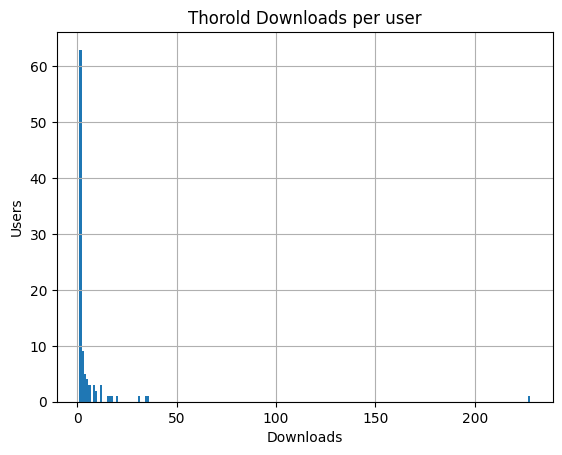

In [50]:
thorold_downloads = data[data["city"] == "Thorold"]
# thorold_downloads
thorold_downloads = thorold_downloads.groupby("user_code").count().sort_values(by = "doi", ascending = False).doi
# thorold_downloads
bins = 200


plt.hist(thorold_downloads[0:100], bins)
plt.ylabel("Users")
plt.xlabel("Downloads")
plt.title("Thorold Downloads per user")
plt.grid()
plt.show()

#### Draw a pie of top five cities.

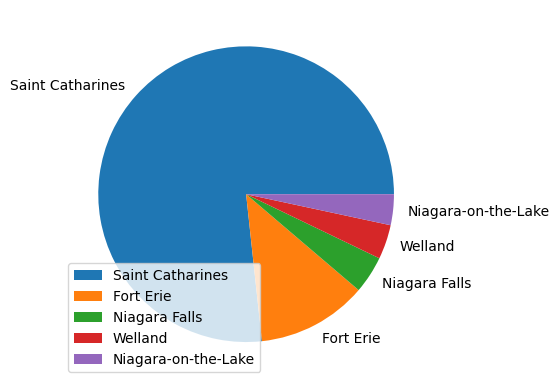

In [56]:
cities = data["city"].value_counts()[0:5]
city_labels = data["city"].unique()[0:5]
plt.pie(cities, labels= city_labels)
plt.legend(loc="best")
plt.show()